In [ ]:
"""
@author: Jay Shankar Bhatt :
cradit: Sreenivas Bhattiprolu
please look on his repo for awesome Deep learning examples
also his youtube video #https://youtu.be/6S2v7G-OupA

Shows errors on Tensorflow 1.4 and Keras 2.0.8
Works fine in Tensorflow: 2.2.0
    Keras: 2.4.3
dataset: https://finance.yahoo.com/quote/GE/history/
Also try S&P: https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC
"""

In [19]:
import numpy as np 
import pandas as pd
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [12]:
df = pd.read_csv("data/GE.csv")[['Date','Close']]

In [13]:
df.head(2)

,Date,Close
0,1970-11-03,5.441962
1,1970-11-04,5.496695


In [14]:
df['Date']= pd.to_datetime(df['Date'])

<AxesSubplot:xlabel='Date', ylabel='Close'>

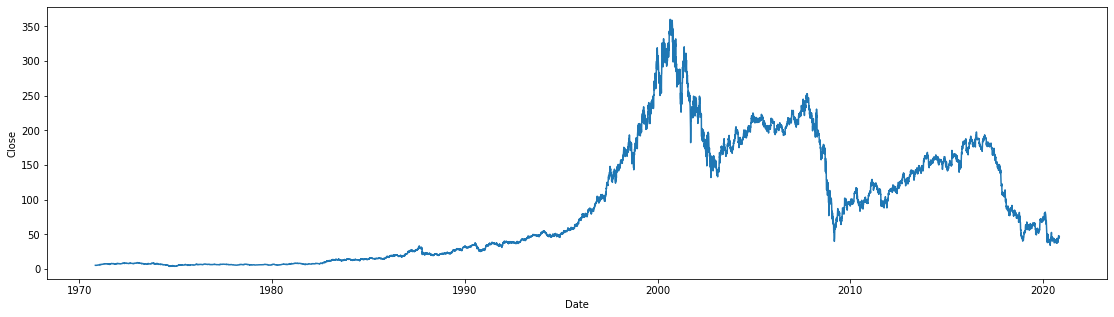

In [16]:
fig, ax = plt.subplots(figsize=(19, 5))
sns.lineplot(x= df['Date'],y=df['Close'],ax= ax)

In [17]:
print("Start date is : ",df['Date'].min())
print("End date is : ",df['Date'].max())


Start date is :  1970-11-03 00:00:00
End date is :  2020-11-02 00:00:00


In [18]:
train,test = df.loc[df['Date']<='2003-12-31'],df.loc[df['Date']>'2003-12-31']

In [20]:
scaler = StandardScaler()

In [23]:
scaler.fit(train[['Close']])

StandardScaler()

In [24]:
train['Close'] = scaler.transform(train[['Close']])
test['Close'] = scaler.transform(test[['Close']])

/Users/jay/opt/anaconda3/envs/tf_test/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jay/opt/anaconda3/envs/tf_test/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Date', ylabel='Close'>

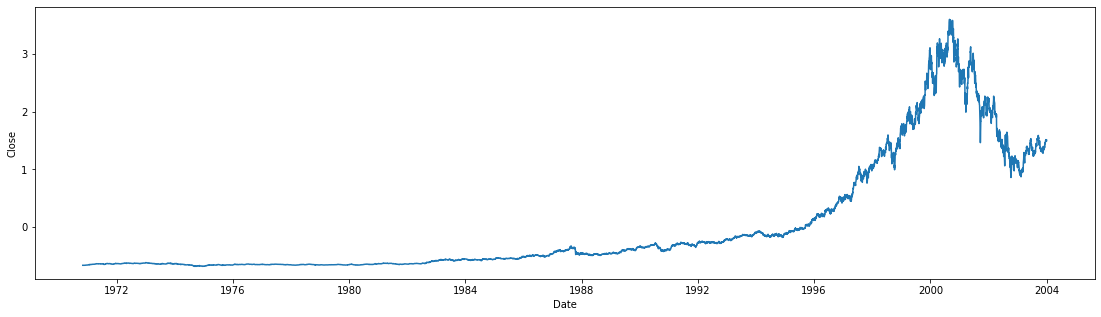

In [25]:
fig, ax = plt.subplots(figsize=(19, 5))
sns.lineplot(x= train['Date'],y=train['Close'],ax= ax)

<AxesSubplot:xlabel='Date', ylabel='Close'>

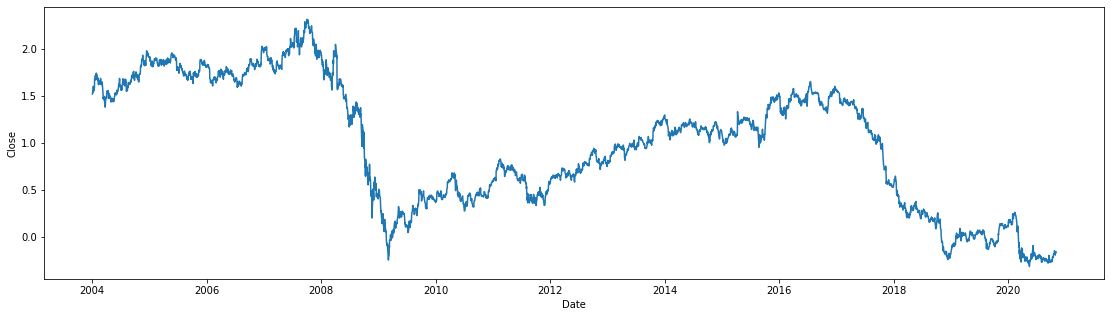

In [27]:
fig, ax = plt.subplots(figsize=(19, 5))
sns.lineplot(x= test['Date'],y=test['Close'],ax= ax)

In [37]:
seq_size= 30
## larger sequence size may imporve the forecasting

def to_sequence(x,y,seq_size= 1):
    x_val = []
    y_val = []
    
    for i in range(len(x)-seq_size):
        x_val.append(x.iloc[i:i+seq_size].values)
        y_val.append(y.iloc[i+seq_size])
    return np.array(x_val),np.array(y_val)

trainx,trainy = to_sequence(train[['Close']],train['Close'],seq_size)
testx,testy = to_sequence(test[['Close']],test['Close'],seq_size)

In [39]:
trainx.shape

(8343, 30, 1)

In [58]:
model = Sequential()
model.add(LSTM(128,input_shape =(trainx.shape[1],trainx.shape[2])))
model.add(Dropout(rate = .2))
model.add(RepeatVector(trainx.shape[1]))
model.add(LSTM(128,return_sequences= True))
model.add(Dropout(rate = .2))          
model.add(TimeDistributed(Dense(trainx.shape[2])))

In [59]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 128)               66560     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
repeat_vector_10 (RepeatVect (None, 30, 128)           0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 30, 128)           131584    
_________________________________________________________________
dropout_14 (Dropout)         (None, 30, 128)           0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 30, 1)             129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_______________________________________________

In [99]:
model.compile(optimizer='adam',loss='mae',metrics='MAE')

In [68]:
from tensorflow.keras.callbacks import EarlyStopping

In [70]:
es = EarlyStopping(monitor='val_loss',patience=5)

In [111]:
es = EarlyStopping(monitor='val_loss',patience=5)
history = model.fit(trainx,trainy,epochs=100,batch_size=32,validation_split=.1,callbacks=[es])
model.save("model_trainy.h5")
history_traiy = history.history.copy()

Epoch 1/100
235/235 [==============================] - 10s 41ms/step - loss: 0.0223 - MAE: 0.0223 - val_loss: 0.0806 - val_MAE: 0.0806
Epoch 2/100
235/235 [==============================] - 10s 41ms/step - loss: 0.0224 - MAE: 0.0224 - val_loss: 0.1042 - val_MAE: 0.1042
Epoch 3/100
235/235 [==============================] - 10s 42ms/step - loss: 0.0222 - MAE: 0.0222 - val_loss: 0.0549 - val_MAE: 0.0549
Epoch 4/100
235/235 [==============================] - 10s 41ms/step - loss: 0.0225 - MAE: 0.0225 - val_loss: 0.0706 - val_MAE: 0.0706
Epoch 5/100
235/235 [==============================] - 10s 43ms/step - loss: 0.0225 - MAE: 0.0225 - val_loss: 0.0597 - val_MAE: 0.0597
Epoch 6/100
235/235 [==============================] - 11s 46ms/step - loss: 0.0219 - MAE: 0.0219 - val_loss: 0.0628 - val_MAE: 0.0628
Epoch 7/100
235/235 [==============================] - 10s 43ms/step - loss: 0.0219 - MAE: 0.0219 - val_loss: 0.0602 - val_MAE: 0.0602
Epoch 8/100
235/235 [==============================] - 

In [113]:
es = EarlyStopping(monitor='val_loss',patience=5)
history = model.fit(trainx,trainx,epochs=100,batch_size=32,validation_split=.1,callbacks=[es])
model.save("model_trainx.h5")
history_trainx = history.history.copy()

Epoch 1/100
235/235 [==============================] - 10s 41ms/step - loss: 0.0283 - MAE: 0.0283 - val_loss: 0.1427 - val_MAE: 0.1427
Epoch 2/100
235/235 [==============================] - 10s 41ms/step - loss: 0.0278 - MAE: 0.0278 - val_loss: 0.1218 - val_MAE: 0.1218
Epoch 3/100
235/235 [==============================] - 10s 43ms/step - loss: 0.0273 - MAE: 0.0273 - val_loss: 0.1270 - val_MAE: 0.1270
Epoch 4/100
235/235 [==============================] - 10s 42ms/step - loss: 0.0263 - MAE: 0.0263 - val_loss: 0.1162 - val_MAE: 0.1162
Epoch 5/100
235/235 [==============================] - 10s 42ms/step - loss: 0.0263 - MAE: 0.0263 - val_loss: 0.1153 - val_MAE: 0.1153
Epoch 6/100
235/235 [==============================] - 10s 41ms/step - loss: 0.0260 - MAE: 0.0260 - val_loss: 0.1193 - val_MAE: 0.1193
Epoch 7/100
235/235 [==============================] - 10s 41ms/step - loss: 0.0260 - MAE: 0.0260 - val_loss: 0.1138 - val_MAE: 0.1138
Epoch 8/100
235/235 [==============================] - 

In [ ]:
# plt.plot(history.history['loss'],label= 'train_loss')
# plt.plot(history.history['val_loss'],label= 'val_loss')

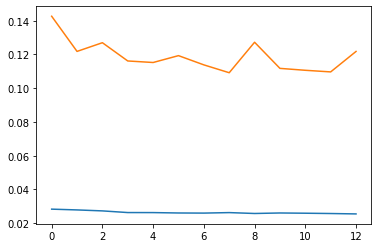

In [114]:
plt.plot(history.history['loss'],label= 'train_loss')
plt.plot(history.history['val_loss'],label= 'val_loss')

In [128]:
train_predict = model.predict(trainx)

In [129]:
trainMAE = np.mean(np.abs(train_predict-trainx),axis=1)

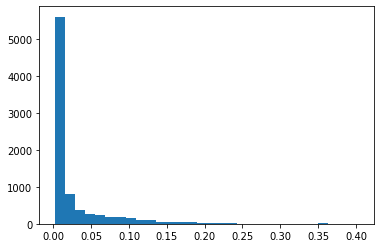

In [130]:
plt.hist(trainMAE,bins=30)
plt.show()

## so we can putup a threshold of .2 for anomaly

In [120]:
np.mean(trainMAE)

0.028724152832242326

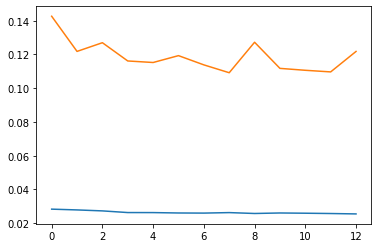

In [121]:
plt.plot(history.history['loss'],label= 'train_loss')
plt.plot(history.history['val_loss'],label= 'val_loss')

In [125]:
# pred = model.predict(testx)
testMAE = np.mean(np.abs(pred-testx),axis=1)

In [131]:
anomaly_df =pd.DataFrame(test[seq_size:])
anomaly_df['testMAE'] =testMAE
anomaly_df['Max_tranMAE'] =.2
anomaly_df['anomaly'] = anomaly_df['testMAE']>anomaly_df['Max_tranMAE']

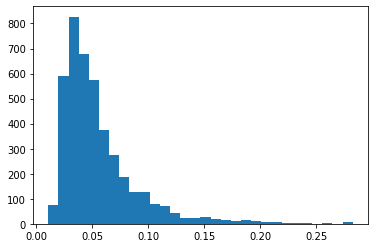

In [126]:
plt.hist(trainMAE,bins=30)
plt.show()

<AxesSubplot:xlabel='Date', ylabel='testMAE'>

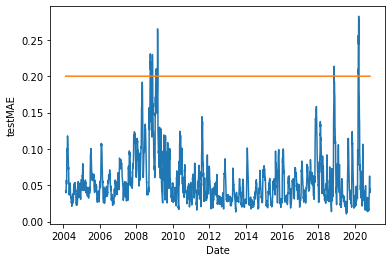

In [137]:
sns.lineplot(x= anomaly_df['Date'],y=anomaly_df['testMAE'])
sns.lineplot(x= anomaly_df['Date'],y=anomaly_df['Max_tranMAE'])

In [151]:
anomaly = anomaly_df[anomaly_df['anomaly']]

<AxesSubplot:xlabel='Date'>

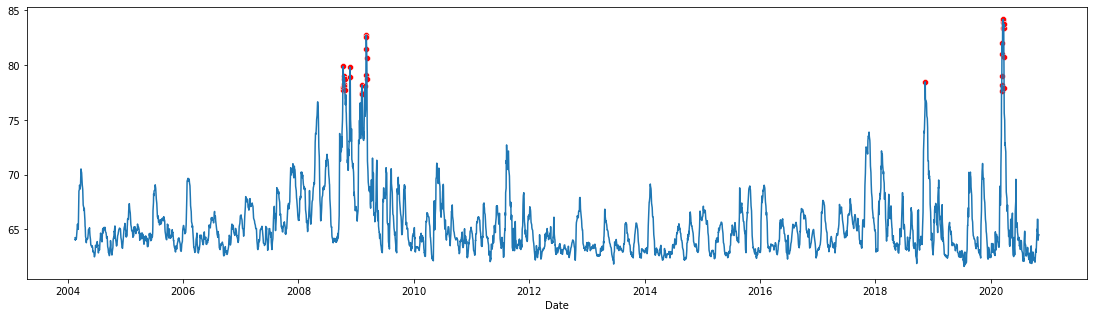

In [156]:
fig, ax = plt.subplots(figsize=(19, 5))
sns.lineplot(x= anomaly_df['Date'],y=scaler.inverse_transform(anomaly_df[['testMAE']]).flatten(),ax=ax)
sns.scatterplot(x= anomaly['Date'],y=scaler.inverse_transform(anomaly[['testMAE']]).flatten(),color ='red',ax=ax)
# sns.lineplot(x= anomaly_df['Date'],y=anomaly_df['Max_tranMAE'])